**Nama: Ivan Aditya Maulana**

**Email: vantelkom@gmail.com**

**Submission: Klasifikasi Gambar**

In [ ]:
#Import library pandas alias pd
import pandas as pd
#Import library numpy alias np
import numpy as np
#Import modul os untuk menampilkan direktori yang akan disimpan
#Import modul zipfile untuk meneruskan file dari zip
#Import modul shutil untuk mendukung penyalinan dan penghapusan file
import os, zipfile, shutil
#Import modul tensorflow berfungsi untuk melakukan iterasi
import tensorflow as tf
#Import modul matplot sebagai fungsi plot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#Import library sklearn untuk algoritma Linear Regression
#Import library sklearn untuk membagi data menjadi training dan testing set
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#Import library RMSprop untuk mengoptimalkan penurunan gradien dengan momentum
#Import library keras Image Generator untuk menghasilkan data gambar tensor dengan augmentasi
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import files

In [ ]:
#Mempersiapkan data dari link Dicoding menggunakan wget command
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /content/rockpaperscissors.zip

--2021-07-26 20:04:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/content/rockpaperscissors.zip’

/content/rockpapers 100%[===================>] 307.92M  4.55MB/s    in 79s     

2021-07-26 20:05:42 (3.87 MB/s) - ‘/content/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Lokasi file yang akan diextract
lokasi_zip = '/content/rockpaperscissors.zip'
#Melakukan proses extract pada file zip
zip_ext = zipfile.ZipFile(lokasi_zip, 'r')
#File telah diextract
zip_ext.extractall('/dataset')
#Fungsi extract diberhentikan
zip_ext.close()

dataset_folder = "/dataset/rockpaperscissors/rps-cv-images"

In [ ]:
#Daftar nama entri dalam direktori
os.listdir(dataset_folder)

['scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

In [ ]:
#Menyimpan dan  membuat jalur untuk file atau folder
rock_folder = os.path.join("/dataset/rockpaperscissors/rps-cv-images/rock")
paper_folder = os.path.join("/dataset/rockpaperscissors/rps-cv-images/paper")
scissors_folder = os.path.join("/dataset/rockpaperscissors/rps-cv-images/scissors")

In [3]:
rock_img = os.listdir(rock_folder)
paper_img = os.listdir(paper_folder)
scissors_img = os.listdir(scissors_folder)

#Menampilkan jumlah gambar pada masing-masing folder sebanyak 3
print("Tampilkan folder gambar:")
print("Batu:",rock_img[:3])
print("Kertas:",paper_img[:3])
print("Gunting:",scissors_img[:3])

NameError: ignored

In [ ]:
#Menampilkan jumlah keseluruhan gambar pada masing-masing folder
print('Jumlah gambar batu :', len(os.listdir(img_rock)))
print('Jumlah gambar kertas :', len(os.listdir(img_paper)))
print('Jumlah gambar gunting :', len(os.listdir(img_scissors)))

Jumlah gambar batu : 726
Jumlah gambar kertas : 712
Jumlah gambar gunting : 750


In [ ]:
#Class mode categorial
#Fungsi Image Generator untuk menambah gambar saat model sedang berjalan
training_datagen = ImageDataGenerator(
#Menormalisasi data dengan mengubah faktor skala
    rescale = 1./255,
#Augmentasi, melakukan skenario pada gambar
    rotation_range = 30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2, 
    validation_split = 0.4,
    brightness_range = [0.2,1.0],
    horizontal_flip = True,
    fill_mode = "nearest"
)

#Generator training berfungsi untuk menghasilkan data dengan menulis skrip
training_generator = training_datagen.flow_from_directory(
    dataset_folder,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = True,
    subset = "training"
)

Found 1314 images belonging to 3 classes.


In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,

    rotation_range = 30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2, 
    validation_split = 0.4,
    brightness_range = [0.2,1.0],
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = "nearest"
)

#Generator validasi
validation_generator = validation_datagen.flow_from_directory(
    dataset_folder,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = False,
    subset = "validation"
)

Found 874 images belonging to 3 classes.


In [ ]:
#Membuat model sequential untuk menumpukkan linier lapisan
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), strides = (1,1), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
    tf.keras.layers.Conv2D(64, (3,3), strides = (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
    tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), strides = (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),

#Untuk meratakan input
    tf.keras.layers.Flatten(),

#Menetapkan unit input dengan frekuensi laju selama waktu sedang berjalan
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
#Mendefinisikan fungsi kerugian, pengoptimal, dan metrik
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      Train_generator,
      steps_per_epoch=50, 
      epochs=25,
      validation_data=Validation_generator, 
      validation_steps=5,  
      verbose=2)

Epoch 1/25
50/50 - 47s - loss: 0.0545 - accuracy: 0.9875 - val_loss: 3.6205e-04 - val_accuracy: 1.0000
Epoch 2/25
50/50 - 46s - loss: 0.0393 - accuracy: 0.9860 - val_loss: 0.0981 - val_accuracy: 0.9750
Epoch 3/25
50/50 - 46s - loss: 0.0720 - accuracy: 0.9762 - val_loss: 0.0692 - val_accuracy: 0.9750
Epoch 4/25
50/50 - 46s - loss: 0.0290 - accuracy: 0.9887 - val_loss: 0.2777 - val_accuracy: 0.9000
Epoch 5/25
50/50 - 46s - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/25
50/50 - 45s - loss: 0.0242 - accuracy: 0.9898 - val_loss: 0.0351 - val_accuracy: 0.9875
Epoch 7/25
50/50 - 45s - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0967 - val_accuracy: 0.9500
Epoch 8/25
50/50 - 46s - loss: 0.0137 - accuracy: 0.9912 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 9/25
50/50 - 45s - loss: 0.0426 - accuracy: 0.9873 - val_loss: 0.2839 - val_accuracy: 0.9500
Epoch 10/25
50/50 - 46s - loss: 0.0254 - accuracy: 0.9912 - val_loss: 0.0198 - val_accuracy: 1.0000
Epoch

Saving 2C9FEbBklwcVhF3W.png to 2C9FEbBklwcVhF3W.png
2C9FEbBklwcVhF3W.png
Kategori : Gunting


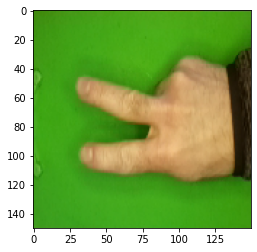

In [ ]:
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=16)
  
  print(fn)
  if classes[0][0] == 1:
    print('Kategori : Kertas')
  elif classes[0][1] == 1:
    print('Kategori : Batu')
  else:
    print('Kategori : Gunting')